In [100]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

In [101]:
df=pd.read_csv("C://Users//Desktop//Dataset//Oil//BrentOilPrices.csv")

In [102]:
#exploring data

df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [103]:
df.dtypes

Date      object
Price    float64
dtype: object

In [104]:
# Convert Date (object) to datetime

df.Date=pd.to_datetime(df.Date)

In [105]:
df=df.sort_values('Date')
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [106]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [107]:
df.describe()

,Price
count,8360.000000
mean,46.459669
std,32.504671
min,9.100000
25%,18.780000
50%,31.750000
75%,67.042500
max,143.950000


In [108]:
df.sample(5)

,Date,Price
4122,2003-08-11,30.05
6863,2014-06-10,109.18
1875,1994-09-26,16.10
8081,2019-03-22,66.29
7726,2017-10-25,58.45


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8360 entries, 0 to 8359
Data columns (total 2 columns):
Date     8360 non-null datetime64[ns]
Price    8360 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 195.9 KB


In [110]:
#df = df.groupby('Date')['Price'].sum().reset_index()
df.set_index('Date', inplace=True)

In [111]:
df.dtypes

Price    float64
dtype: object

In [112]:
df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [113]:
df.index

DatetimeIndex(['1987-05-20', '1987-05-21', '1987-05-22', '1987-05-25',
               '1987-05-26', '1987-05-27', '1987-05-28', '1987-05-29',
               '1987-06-01', '1987-06-02',
               ...
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-20', '2020-04-21'],
              dtype='datetime64[ns]', name='Date', length=8360, freq=None)

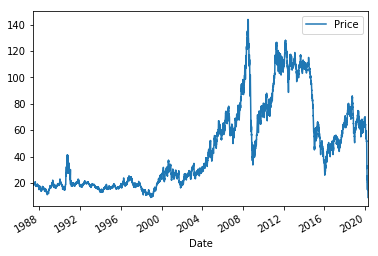

In [114]:
df.plot()

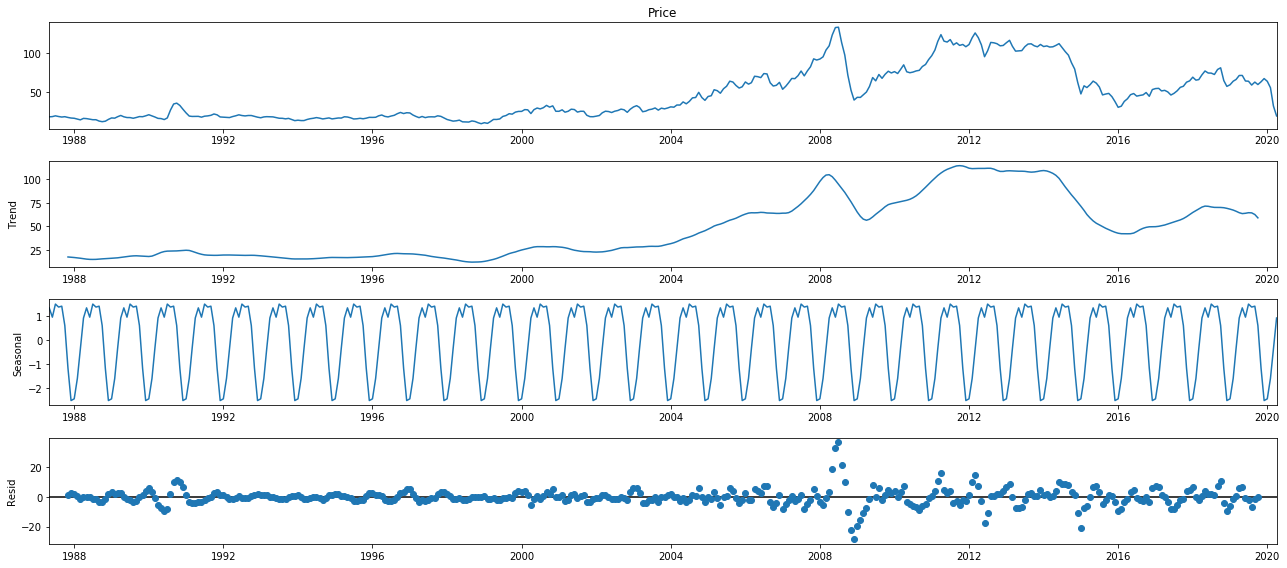

In [116]:
from pylab import rcParams
import statsmodels.api as sm
y = df['Price'].resample('MS').mean()
rcParams['figure.figsize'] = 18, 8
result = sm.tsa.seasonal_decompose(y, model='additive')

fig = result.plot()


In [117]:
# Check if data is stationary
# if P_value is less than 0.05 reject the null hypothesis and infer that data is stationary
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))
        
check_stationarity(df.Price)

The test statistic: -2.018653
p-value: 0.278455
Critical Values:
1%: -3.431
5%: -2.862
10%: -2.567


In [119]:
# according to the P_value data is not stationary, 
#data transformation is done to achieve the stationary
temp_log=np.log(df.Price)
temp_log.head(4)
check_stationarity(temp_log)

The test statistic: -1.560254
p-value: 0.503522
Critical Values:
1%: -3.431
5%: -2.862
10%: -2.567


In [120]:
tem_log_dif=np.diff(temp_log)
check_stationarity(tem_log_dif)

The test statistic: -12.603089
p-value: 0.000000
Critical Values:
1%: -3.431
5%: -2.862
10%: -2.567


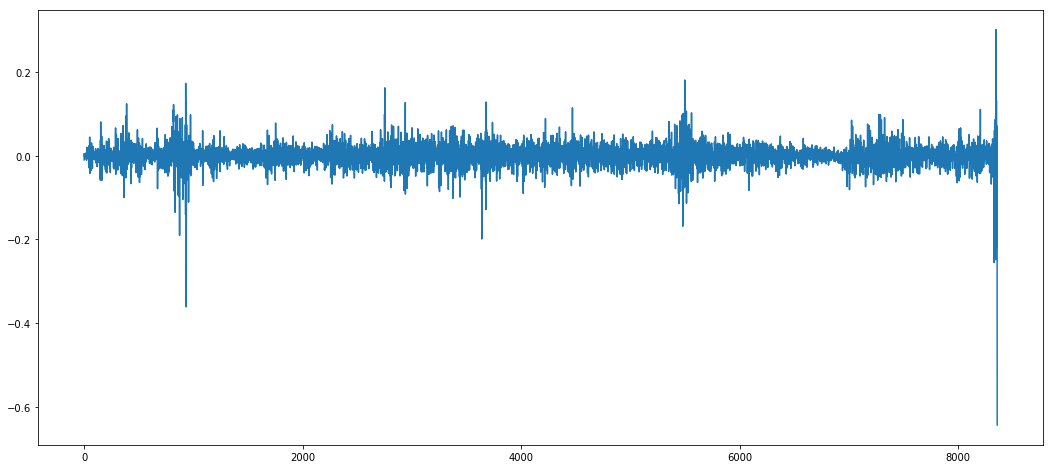

In [127]:
import matplotlib.pyplot as plt 
plt.plot(tem_log_dif)
plt.show()

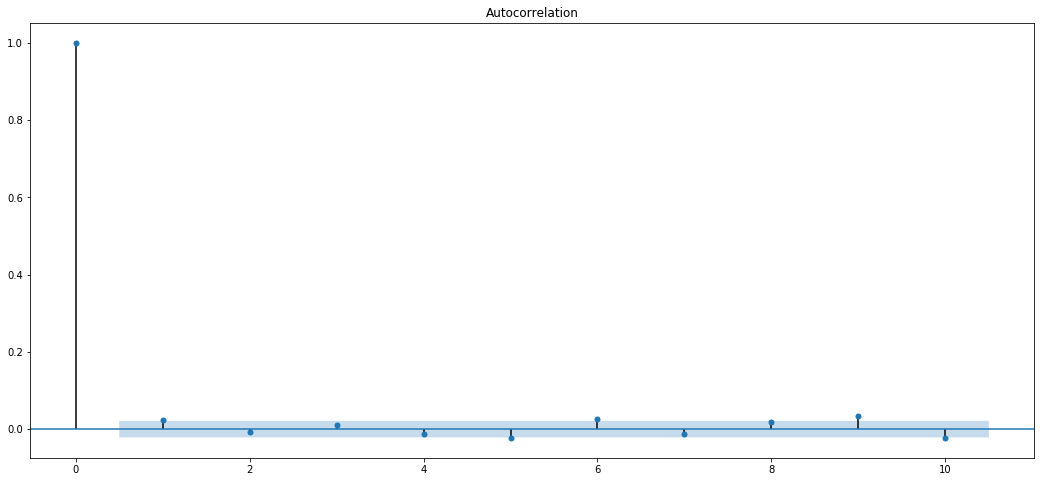

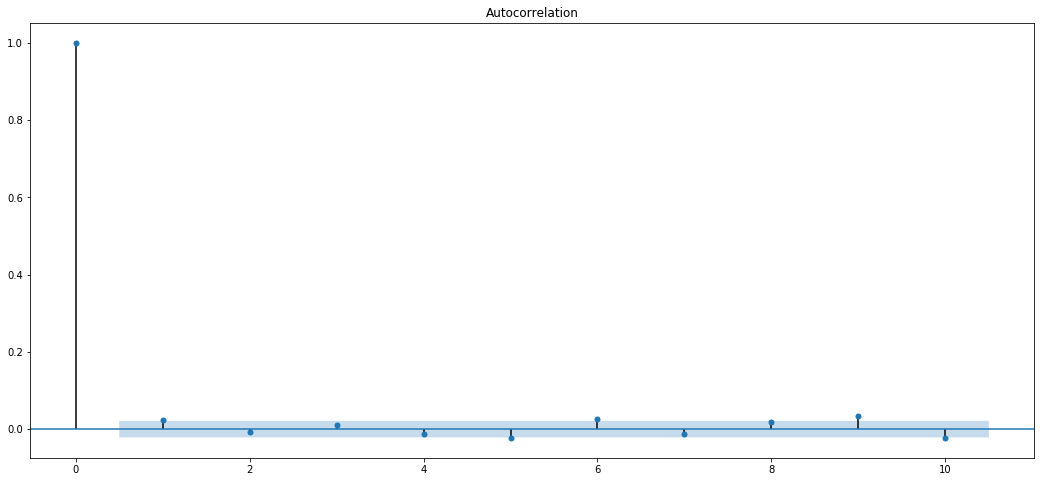

In [139]:
# Define the order of MA model (q)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(tem_log_dif,lags=10)


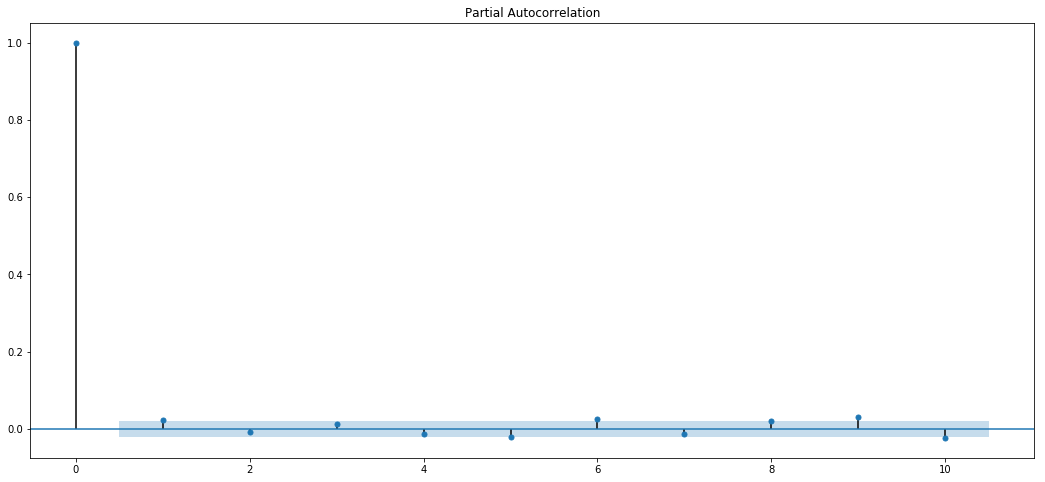

<Figure size 720x144 with 0 Axes>

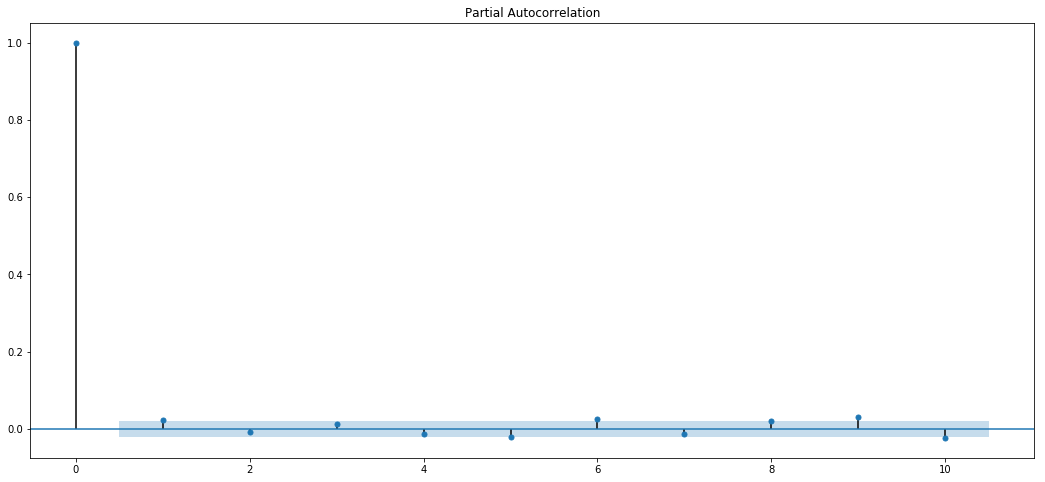

In [140]:
# define the order of AR, p
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,2))
plot_pacf(tem_log_dif,lags=10)

In [147]:
from statsmodels.tsa.arima_model import ARIMA
mod= ARIMA(df.Price,order=(2,0,1))
results = mod.fit()
print(results.summary())

C:\Users\bidar20m\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                 8360
Model:                     ARMA(2, 1)   Log Likelihood              -12637.906
Method:                       css-mle   S.D. of innovations              1.097
Date:                Tue, 13 Oct 2020   AIC                          25285.812
Time:                        18:41:41   BIC                          25320.968
Sample:                             0   HQIC                         25297.819
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.1373     17.680      2.101      0.036       2.485      71.789
ar.L1.Price     0.7517      0.125      6.032      0.000       0.507       0.996
ar.L2.Price     0.2475      0.125      1.987    

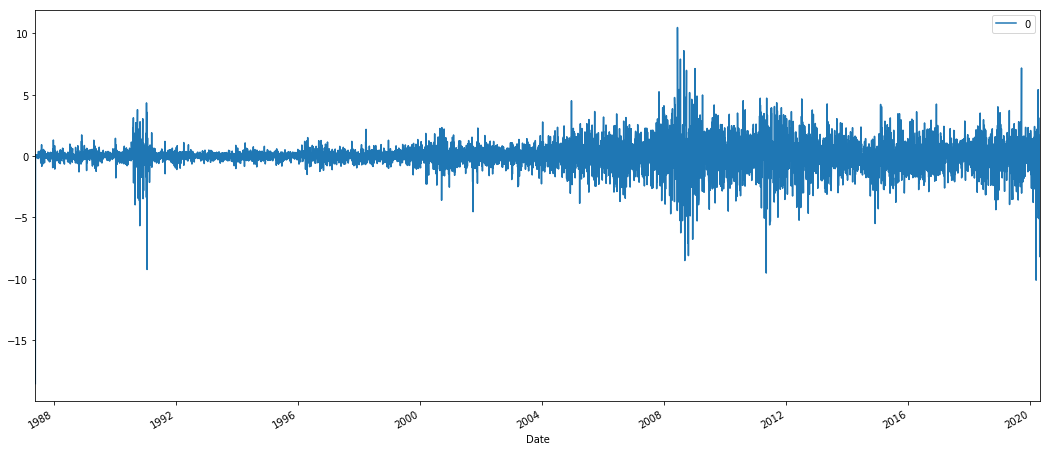

In [148]:
residuals=pd.DataFrame(results.resid)
residuals.plot()

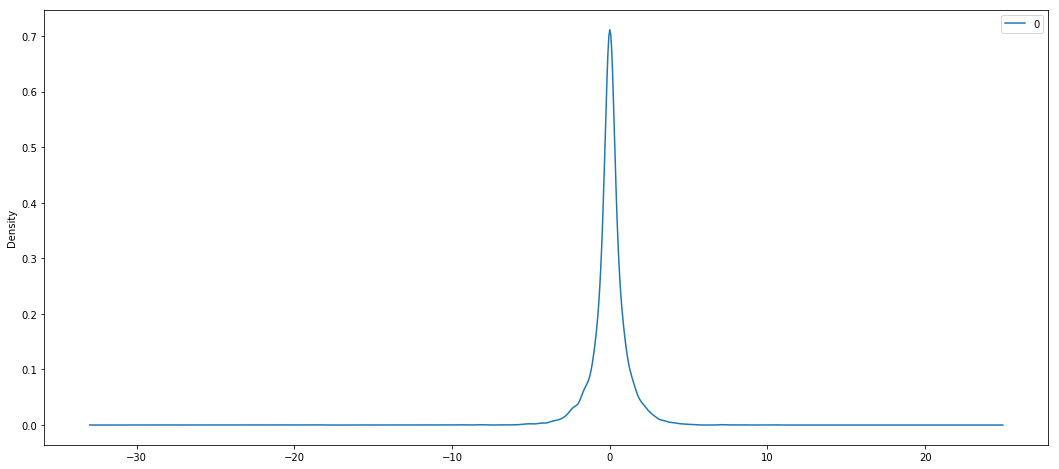

In [149]:
residuals.plot(kind='kde')

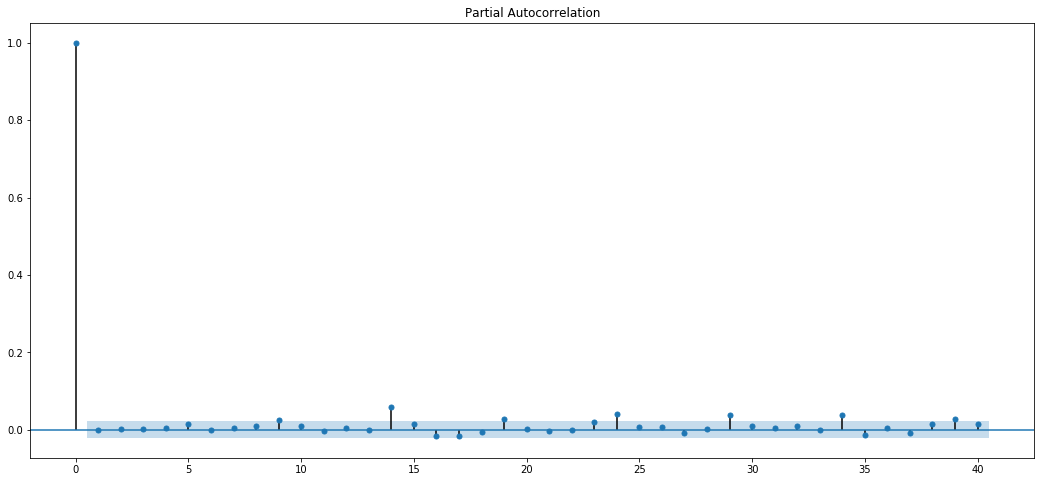

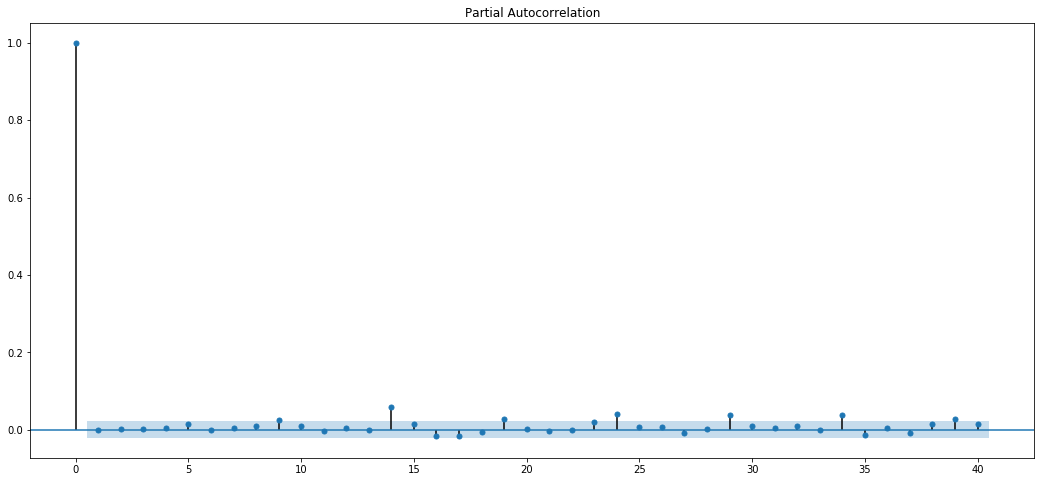

In [150]:
plot_pacf(residuals)

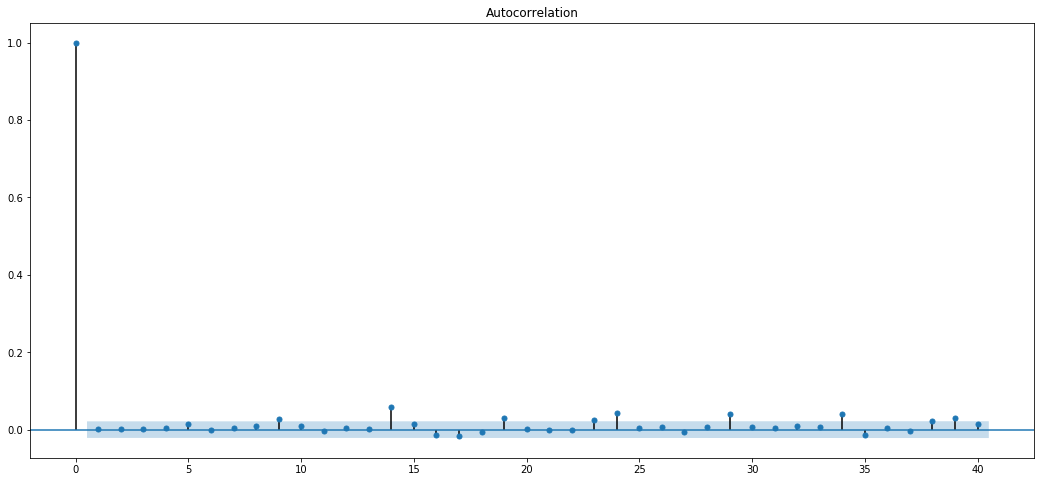

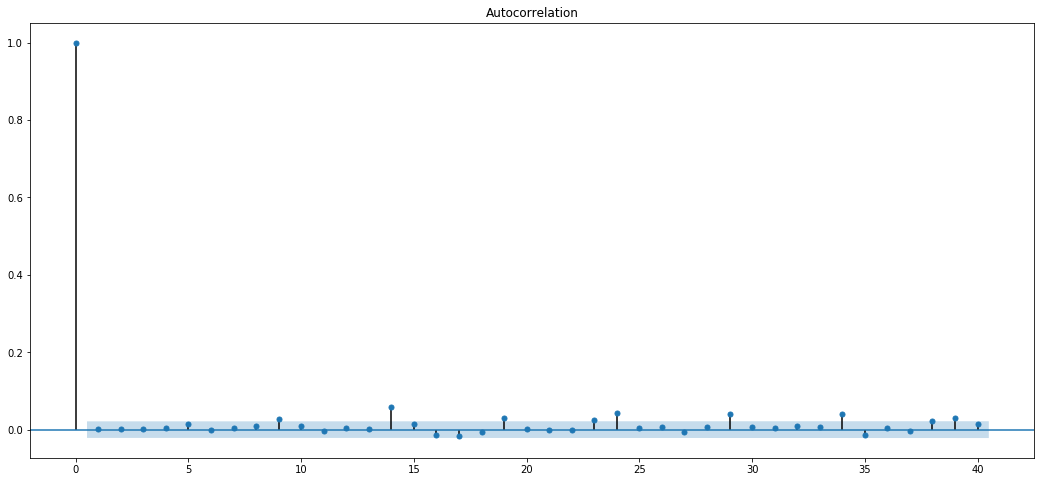

In [151]:
plot_acf(residuals)

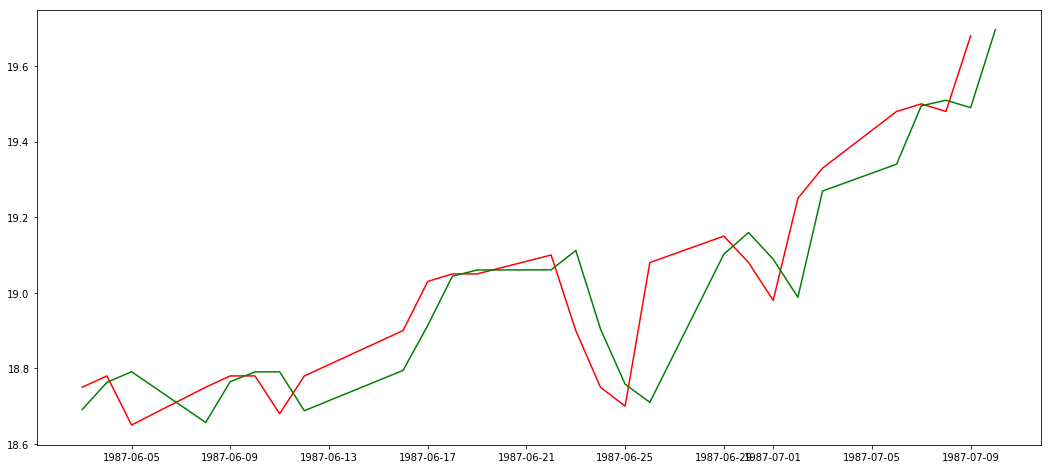

In [152]:
from math import sqrt
from sklearn.metrics import mean_squared_error
plt.plot(df.Price[10:36],color='r')
plt.plot(results.predict(10,36),color='g')